In [1]:
"""
相關指令：
open venv/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/
rm ~/.matplotlib/fontList.py3k.cache

以下列出檔案較大的可用字體（通常含有中文）
"""
from matplotlib.font_manager import fontManager
import os
fonts = [
    font.name for font in fontManager.ttflist if os.path.exists(font.fname) and os.stat(font.fname).st_size>1e6
]

print(fonts)

['Trattatello', 'System Font', 'System Font', 'Diwan Thuluth', 'Mishafi', 'Arial Unicode MS', 'AppleMyungjo', 'AppleGothic']


In [2]:
import pandas as pd
df = pd.read_csv('0503/month_UV.txt', delimiter='	', na_values=["-"])
df

,日期,鞍部,臺北,基隆,新屋,新竹,板橋,淡水,桃園,苗栗
0,2016/07/01,8,10,9,11,10.0,8,9,9,9
1,2016/07/02,5,9,9,11,9.0,6,10,9,11
2,2016/07/03,8,9,10,10,8.0,8,10,8,10
3,2016/07/04,7,9,11,10,9.0,8,10,10,10
4,2016/07/05,8,13,12,9,8.0,11,11,9,11
5,2016/07/06,10,12,11,10,9.0,11,11,11,10
6,2016/07/07,3,13,11,11,11.0,10,10,11,13
7,2016/07/08,1,3,3,1,1.0,2,3,2,2
8,2016/07/09,6,9,5,9,7.0,9,9,7,10
9,2016/07/10,6,10,5,9,NaN,9,10,9,12


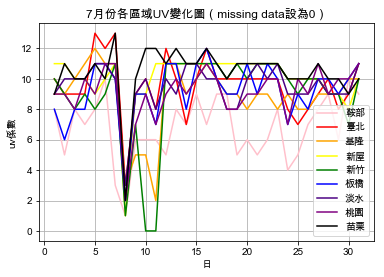

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from itertools import cycle

"""
refs:
    https://stackoverflow.com/questions/19482970/get-list-from-pandas-dataframe-column-headers
    https://stackoverflow.com/questions/29247712/pandas-how-to-replace-with-nan-handling-non-standard-missing-values
    https://stackoverflow.com/questions/3162271/get-loop-count-inside-a-python-for-loop
    https://www.zhihu.com/question/25404709
color:
    https://stackoverflow.com/questions/14720331/how-to-generate-random-colors-in-matplotlib
    https://matplotlib.org/examples/color/named_colors.html
    https://matplotlib.org/api/colors_api.html
"""

df = pd.read_csv('0503/month_UV.txt', delimiter='	', na_values=["-"])
df = df.fillna(0)

x_data = df['日期']
x_index = range(1, len(x_data) + 1) # range(1, 32) = 1~31

# cycol = cycle('bgrcmykw')
colors = [None, 'pink', 'red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple', 'black']
header_names = list(df.columns.values) # ['日期', '鞍部', '臺北', '基隆', '新屋', '新竹', '板橋', '淡水', '桃園', '苗栗']
for i, name in enumerate(header_names):
    if (name != '日期'):
        y_data = df[name]
        # c = next(cycol)
        # c = np.random.rand(3,)
        c = colors[i]
        plt.plot(x_index, y_data, color=c, label=name)

plt.title("7月份各區域UV變化圖（missing data設為0）")
plt.xlabel("日")
plt.ylabel("uv係數")
plt.legend(loc='lower right')
plt.grid(axis='x', linestyle='-')
plt.grid(axis='y', linestyle='-')
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

plt.show()